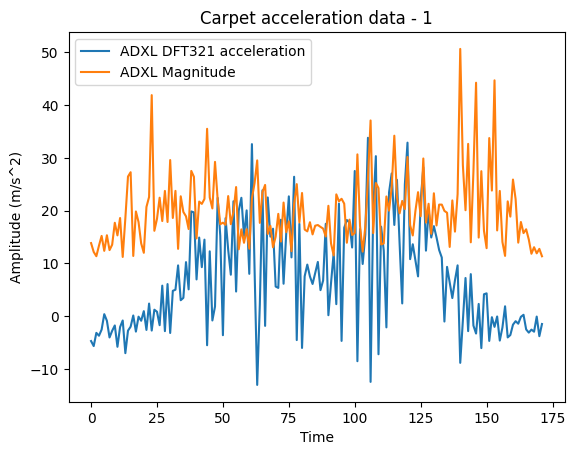

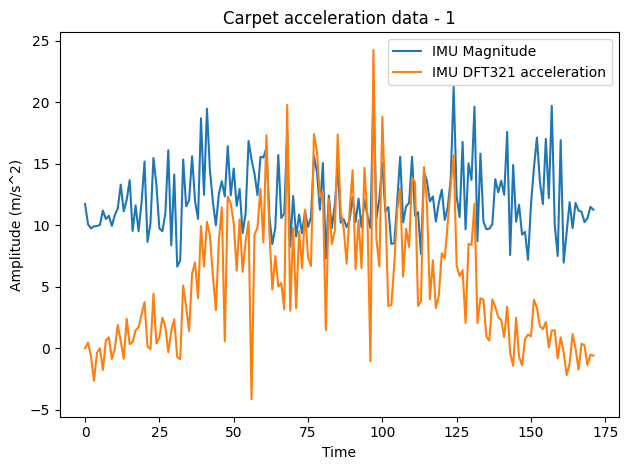

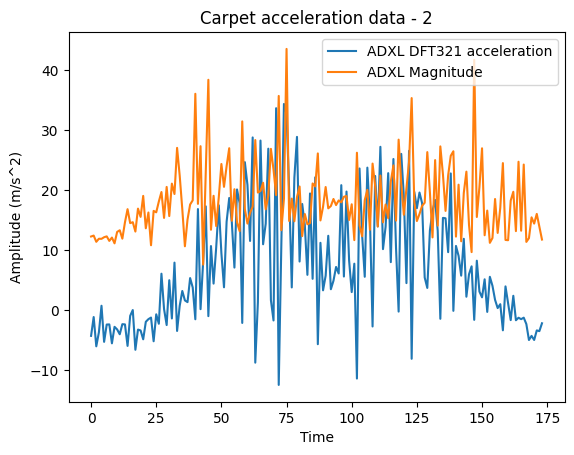

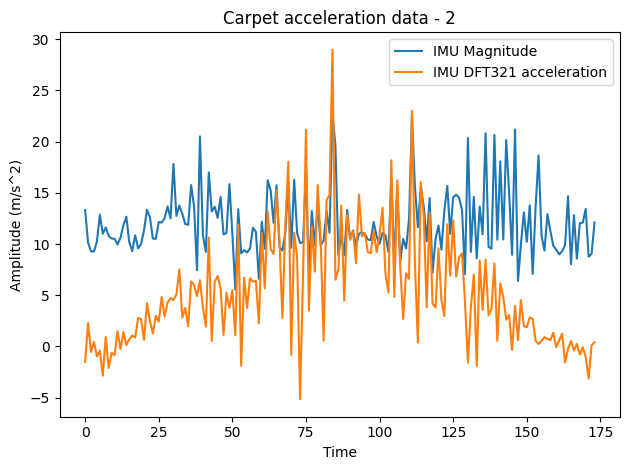

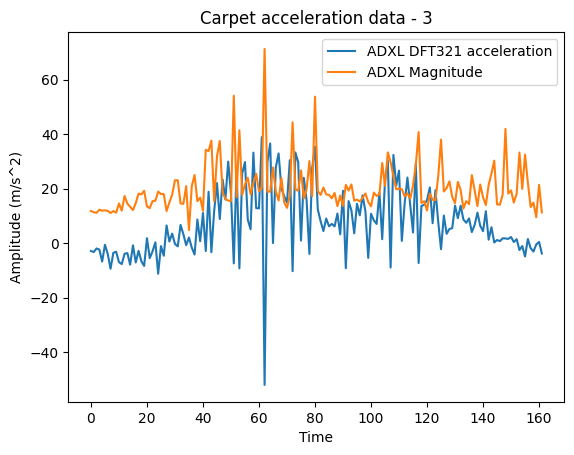

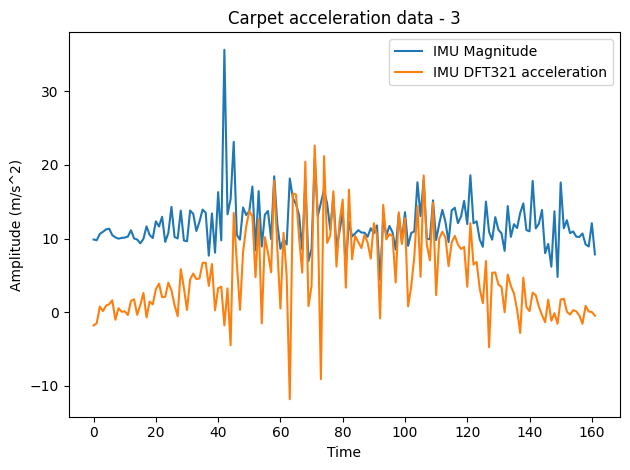

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def smoothed_dft(acceleration):
    N = len(acceleration)
    window = np.hanning(N)  # Select the Hanning window function
    windowed_acceleration = acceleration * window
    dft = np.fft.fft(windowed_acceleration)
    return dft

def calculate_frequency_domain_magnitude(acceleration_array):
    frequency_domain_magnitude = 0
    for acceleration in acceleration_array:
        dft_magnitude = np.abs(smoothed_dft(acceleration))
        frequency_domain_magnitude += pow(dft_magnitude,2)
    return pow(frequency_domain_magnitude,1/2)

def calculate_average_phase(acceleration_array):
    sum_imaginary_parts = 0
    sum_real_parts = 0
    for acceleration in acceleration_array:
        dft = smoothed_dft(acceleration)
        sum_real_parts += np.real(dft)  # Sum of real parts
        sum_imaginary_parts += np.imag(dft)  # Sum of imaginary parts
    
    average_phase = np.arctan2(sum_imaginary_parts, sum_real_parts)  # Calculate average phase
    return average_phase

def perform_inverse_dft(magnitude, phase):
    complex_signal = magnitude * np.exp(1j * phase)  # Construct complex signal from magnitude and phase
    time_domain_signal = np.fft.ifft(complex_signal)  # Compute inverse DFT to obtain time-domain signal
    return time_domain_signal

def generate_time_domain_signal(acceleration_array):
    frequency_domain_magnitude = calculate_frequency_domain_magnitude(acceleration_array)
    average_phase = calculate_average_phase(acceleration_array)
    time_domain_signal = perform_inverse_dft(frequency_domain_magnitude,average_phase)
    return time_domain_signal

chart_cnt=1
excel_file_name = 'Carpet_adxl-3200Hz-16g_imu-562Hz-16g.xlsx'
surface_data = pd.read_excel(excel_file_name,sheet_name=None)
for sheet_name in surface_data.items():
    data = sheet_name[1]
    
    samples = data.get('Samples')
    adxl_mag = data.get('ADXL Magnitude')
    imu_mag = data.get('IMU Magnitude')
    
    adxl_x = data.get('ADXL-X').values
    adxl_y = data.get('ADXL-Y').values
    adxl_z = data.get('ADXL-Z').values
    adxl_acceleration_array =  np.array([adxl_x,adxl_y,adxl_z])
    adxl_time_domain_signal = generate_time_domain_signal(adxl_acceleration_array)
    
    imu_x = data.get('IMU-X').values
    imu_y = data.get('IMU-Y').values
    imu_z = data.get('IMU-Z').values
    imu_acceleration_array =  np.array([imu_x,imu_y,imu_z])
    imu_time_domain_signal = generate_time_domain_signal(imu_acceleration_array)

    # Create a figure and axis object
    fig, ax = plt.subplots()

    # Plot the line
    ax.plot(np.real(adxl_time_domain_signal), label ='ADXL DFT321 acceleration')
    ax.plot(adxl_mag,label = 'ADXL Magnitude')

    # Add labels and title
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude (m/s^2)')
    ax.legend()
    ax.set_title(excel_file_name.split('_')[0]+' acceleration data - '+str(chart_cnt))
    
    
    # Create a figure and axis object
    fig1, ax1 = plt.subplots()

    # Plot the line
    ax1.plot(imu_mag,label = 'IMU Magnitude')
    ax1.plot(np.real(imu_time_domain_signal), label ='IMU DFT321 acceleration')

    # Add labels and title
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude (m/s^2)')
    ax1.legend()
    ax1.set_title(excel_file_name.split('_')[0]+' acceleration data - '+str(chart_cnt))
    chart_cnt+=1
    
    fig1.tight_layout()
    # Display the plot
    plt.show() 